In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

sns.set(style='darkgrid')

%matplotlib inline

In [2]:
%cd C:\Users\a198199\Desktop\DS and ML\BANK MARKETING\bank-additional
%ls

C:\Users\a198199\Desktop\DS and ML\BANK MARKETING\bank-additional
 Volume in drive C is Windows
 Volume Serial Number is 1A05-7F5D

 Directory of C:\Users\a198199\Desktop\DS and ML\BANK MARKETING\bank-additional

2014/03/26  11:28 AM    <DIR>          .
2014/03/26  11:28 AM    <DIR>          ..
2014/03/25  10:52 AM             6 148 .DS_Store
2014/03/25  04:27 PM             3 943 .Rhistory
2014/03/26  11:23 AM           583 898 bank-additional.csv
2014/03/26  11:22 AM         5 834 924 bank-additional-full.csv
2014/03/26  11:27 AM             5 458 bank-additional-names.txt
               5 File(s)      6 434 371 bytes
               2 Dir(s)  217 341 116 416 bytes free


In [3]:
df = pd.read_csv('bank-additional.csv',delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# DESCRIPTIVE STATS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


The dataset had 4119 rows (observations) and 21 columns (features)

In [5]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


The mean age of customers who subscribed to the term deposit is higher than those who didn't.

The average call duration for customers who subscribed was much longer than those who didn't, possibly the 'no' category customers were not interested in the product.

The number of days that passed before a customer was contacted was significantly higher between the two different set of customers, as shown by the average difference in 'pdays'.

During this campaign, customers who were not interested in the product were contacted more that customers who were, as shown by the average difference in 'campaign' 


# EDA and VISUALIZATIONS

In [6]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

Text(0,0.5,'Total Count')

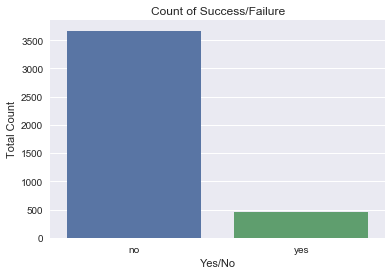

In [7]:
#Total counts of the Y/N categories via a count plot

sns.countplot(x='y',data=df)
plt.title('Count of Success/Failure')
plt.xlabel('Yes/No')
plt.ylabel('Total Count')


Majority of the customers contacted in the previous marketing campaign did not subscribe to the term-deposit

Text(0.5,1,'AGE DISTRIBUTION OF SUCCESSFUL/UNSUCCESSFUL SUBSCRIPTIONS')

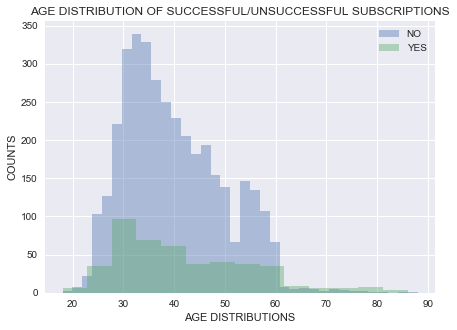

In [8]:
#Distribution of Ages 

plt.figure(figsize=(7,5))
sns.distplot(df['age'][df['y'] == 'no'],label = 'NO',kde=False)
sns.distplot(df['age'][df['y'] == 'yes'],label = 'YES',kde=False)

plt.xlabel('AGE DISTRIBUTIONS')
plt.ylabel('COUNTS')
plt.legend(loc='best')
plt.title('AGE DISTRIBUTION OF SUCCESSFUL/UNSUCCESSFUL SUBSCRIPTIONS')

Most of the customers contacted were in their 30's and 40's

In [9]:
#Frequency table of job groups

job_edu_freq=pd.crosstab(index=df.job,columns=df.education)

print(job_edu_freq)

education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.                8        20        44          311           0   
blue-collar         222       152       324           89           0   
entrepreneur         18         5        23           17           0   
housemaid            52         9         5           11           0   
management           13         8        20           41           0   
retired              59         6        11           24           1   
self-employed        11         2        28           15           0   
services             16        12        56          254           0   
student               2         0         5           35           0   
technician            7        10        34           95           0   
unemployed           13         3        18           23           0   
unknown               8         1         6            6        

Text(0,0.5,'Frequency')

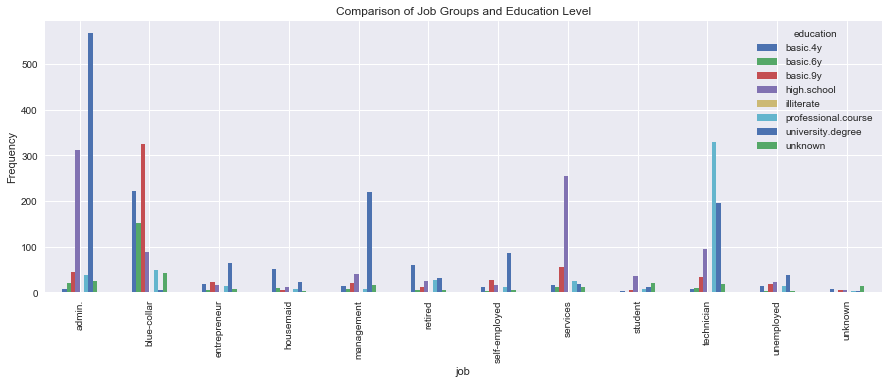

In [10]:
job_edu_freq.plot(kind='bar',figsize=(15,5),title='Comparison of Job Groups and Education Level')
plt.ylabel('Frequency')

Administrators with University Degrees were the most contacted group

In [11]:
yes = df['duration'][(df['y'] == 'yes')].describe()
no = df['duration'][(df['y'] == 'no')].describe()

In [12]:
duration_diff = pd.concat([yes,no],axis=1)
duration_diff.columns = ['YES','NO']
duration_diff

,YES,NO
count,451.000000,3668.000000
mean,560.787140,219.409760
std,411.537717,198.256347
min,63.000000,0.000000
25%,255.500000,96.000000
50%,458.000000,165.000000
75%,761.000000,274.000000
max,3643.000000,3253.000000


Text(0.5,1,'Call Duration Distribution')

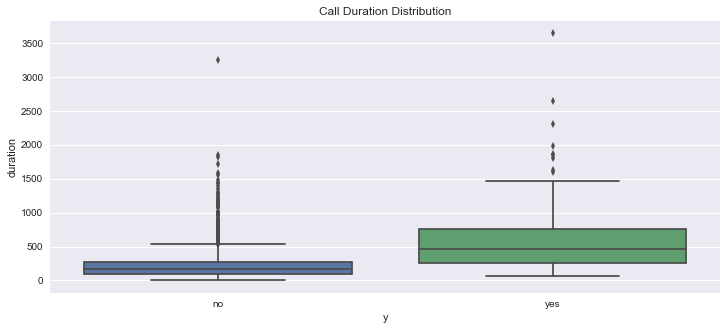

In [13]:
#Boxplot to show Distributions between Call Duration and Success/Failure

plt.figure(figsize=(12,5))
sns.boxplot(x='y',y='duration',data=df)
plt.title('Call Duration Distribution')

In [14]:
#Minimum and Maximum Number of contacts to customers who did not pick their calls and did not 
#subscribe to the term deposit.

df['campaign'][(df['duration']==0) & (df['y'] == 'no')].describe()

count    1.0
mean     4.0
std      NaN
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
Name: campaign, dtype: float64

Majority of the customers called did not subscribe to the term-deposit.

Of the 'No' customers, many of them did not pick up their calls as depicted by the 0 seconds duration of call placed, in contrast to the least call duration of 63 seconds for the 'YES' category, regardless of being called multiple times.


(array([0, 1]), <a list of 2 Text xticklabel objects>)

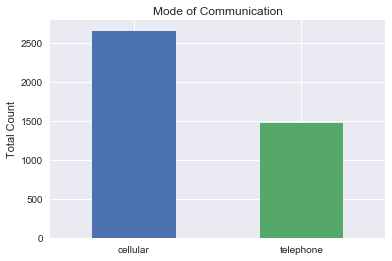

In [15]:
#Showing the different modes of communication used.

df['contact'].value_counts().plot(kind='bar')
plt.title('Mode of Communication')
plt.ylabel('Total Count')
plt.xticks(rotation=0)

Cellular devices were the most common type of communcation device used.

Text(0.5,1,'Call Duration via different contact methods')

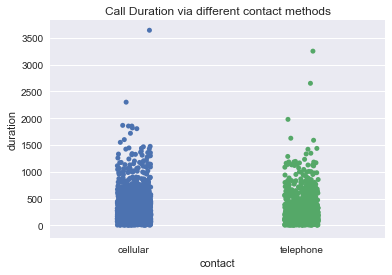

In [16]:
#Strip Plot showing the distribution of calls by the method of communication

sns.stripplot(x='contact',y='duration',data=df,jitter=True)
plt.title('Call Duration via different contact methods')

Call durations on cellular devices were higher than calls placed using landlines.

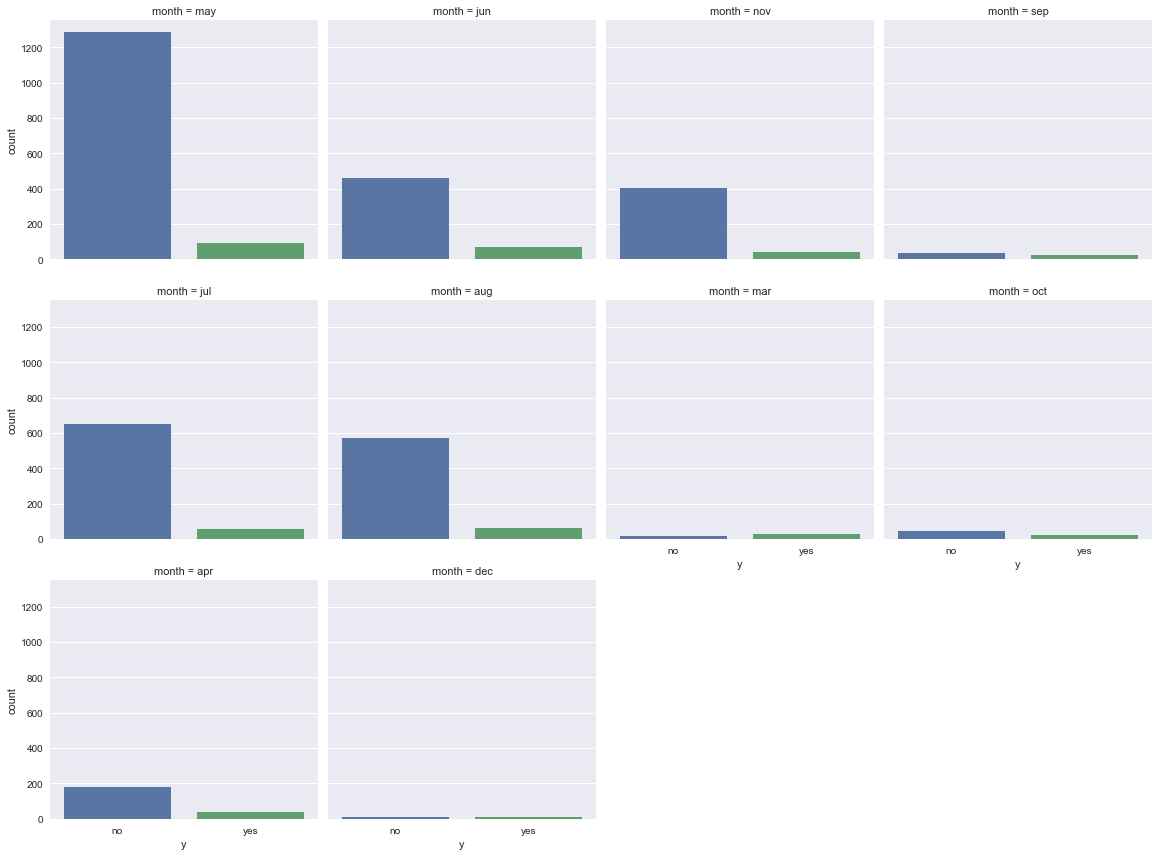

In [17]:
#checking how customers contacted on different Months of the year subscribed

sns.factorplot(x='y',data=df,col='month',col_wrap=4,kind='count')

Most of the customers were contacted during the month of May.

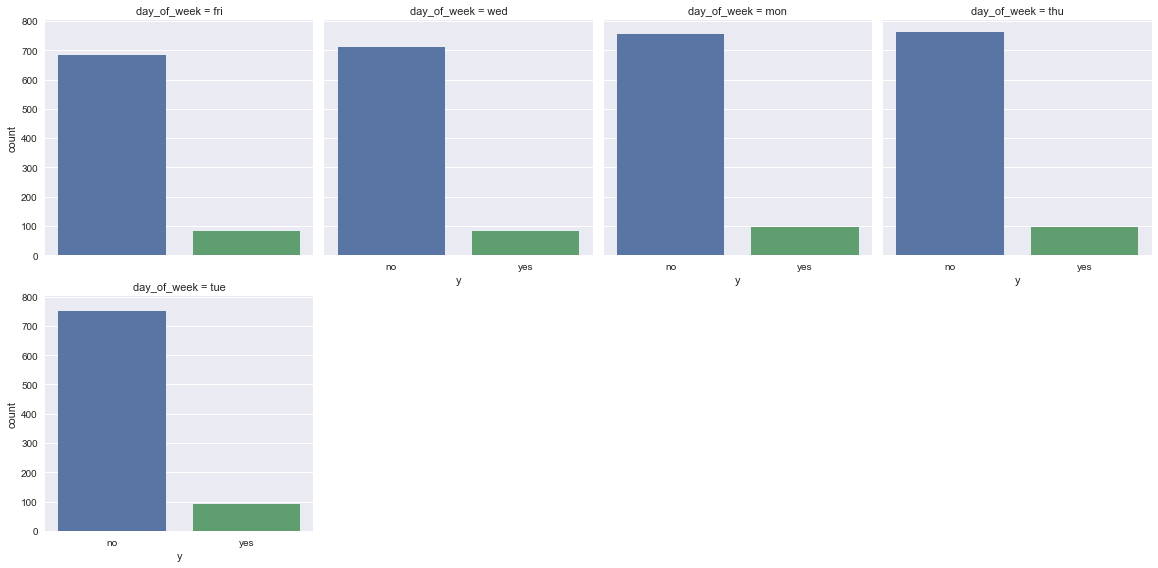

In [18]:
#checking how customers contacted on different days of the week subscribed

sns.factorplot(x='y',data=df
               ,col='day_of_week',col_wrap=4,kind='count')

In [19]:
df.groupby(df['day_of_week'])['y'].count()

day_of_week
fri    768
mon    855
thu    860
tue    841
wed    795
Name: y, dtype: int64

Most of the customers were called on Thursday

In [20]:
'''Chi-Squared Test of Independence to test whether the day of week has an impact on the term-deposits.

Null Hypothesis is that Day of the week contacted does not have a direct impact on subscription of term-deposit.
Alternate Hypothesis is that Day of the Week contacted has a direct impact on subscription of term-deposit
Significance-Level = 0.05'''

sample = df.sample(n=250) #Sample from the entire population dataset

sample = pd.crosstab(index = sample['day_of_week'],columns=sample.y,margins=True) #creating a two-way table of the samples

sample.columns = ['no','yes','row_totals']

sample.index = ['fri','mon','thu','tue','wed','col_totals']

observed = sample.iloc[:5,:2] #Actual values gotten/derived from the sample.

expected = np.outer(sample['row_totals'][0:5],sample.loc['col_totals'][0:2])/250 #Values we expect on the distribution of the population

expected = pd.DataFrame(expected)

expected.columns = ['no','yes']

expected.index = ['fri','mon','thu','tue','wed']

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum() #Chi-Squared Statistic



crit = stats.chi2.ppf(q = 0.95,
                     df = 4)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=4) #The probability of getting a value >= chi_squared_stats

print('Chi Squared Statistic: {}'.format(chi_squared_stat))
print('Critical Value: {}'.format(crit))
print('p-Value: {}'.format(p_value))


Chi Squared Statistic: 2.203867356886535
Critical Value: 9.487729036781154
p-Value: 0.6983213061559006


The test result shows that there is a statistical relationship between the days of the week and the subscription of the term deposit.
We reject the Null Hypothesis in favour of the alternate since the p-value is greater than the significance level, therefore, day_of_week is an important feature to be included in our models.


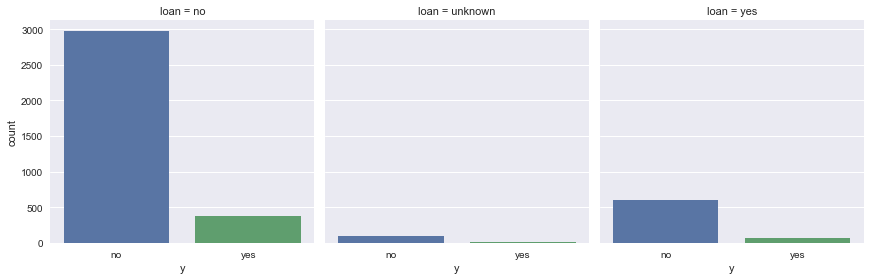

In [21]:
#Factor Plot of the loan status

sns.factorplot(x='y',data=df,col='loan',kind='count')

Majority of the customers contacted have a personal loan with the bank.

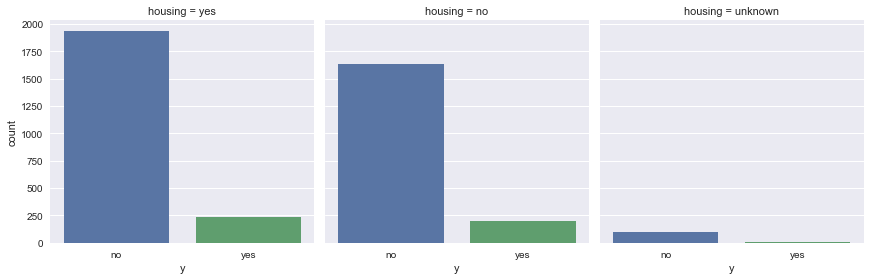

In [22]:
#Factor Plot of the housing loan status of customers

sns.factorplot(x='y',data=df,col='housing',kind='count')

Majority of the customers contacted have a housing loan with the bank.

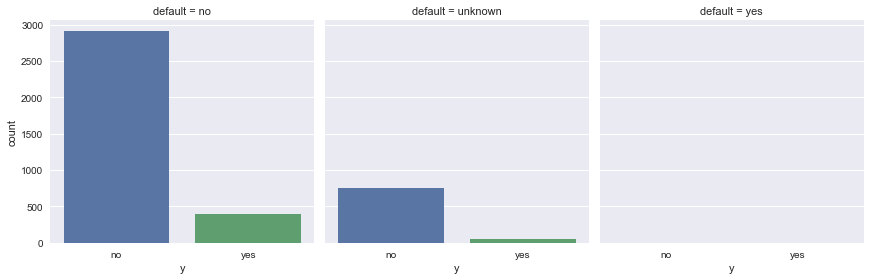

In [23]:
#Factor Plot of credit status of customers

sns.factorplot(x='y',data=df,col='default',kind='count')

Majority of the contacted customers do not have credit.

Text(0.5,1,'Correlation values between Features')

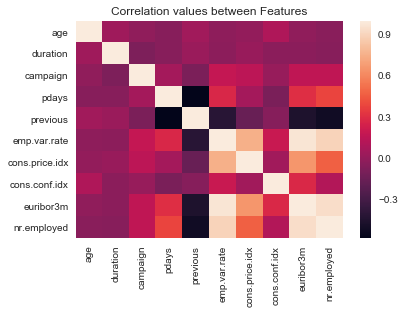

In [24]:
#Heatmap to show the correlation between the numerical values

sns.heatmap(df.corr())

plt.title('Correlation values between Features')

FEATURE ENGINEERING

ONE-HOT ENCODING - Turning Categorical variables into Dummy Variables

In [25]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [26]:
bank = pd.get_dummies(df,columns = df.select_dtypes(include='object').columns,drop_first=True)
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,0,0,1,0,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,0,0,1,0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,1,0,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,1,0,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,1,0,0,0,1,0,0


In [27]:
bank.shape

(4119, 54)

In [28]:
X = bank.iloc[:,:53]
y = bank.y_yes

In [29]:
print(X.shape)
print(y.shape)

(4119, 53)
(4119,)


# IMPLEMENTING DIFFERENT MODELS ON THE DATASET.

In [30]:
#X_test is what you make predictions on.
#y_test has the actual response values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=200)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 53)
(1030, 53)
(3089,)
(1030,)


LOGISTIC REGRESSION

In [32]:
logreg = LogisticRegression()

y_pred = logreg.fit(X_train,y_train).predict(X_test)

accuracy_score(y_test,y_pred)

0.9067961165048544

KNN (K=5)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

y_pred = knn.fit(X_train,y_train).predict(X_test)

accuracy_score(y_test,y_pred)

0.9106796116504854

DECISION TREE

In [34]:
dt = DecisionTreeClassifier()

y_pred = dt.fit(X_train,y_train).predict(X_test)

accuracy_score(y_test,y_pred)

0.8805825242718447

GNB

In [35]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train,y_train).predict(X_test)

accuracy_score(y_test,y_pred)

0.8563106796116505

SVM

In [36]:
svc = SVC()

y_pred = svc.fit(X_train,y_train).predict(X_test)

accuracy_score(y_test,y_pred)

0.8844660194174757

The best model for making prediction on this project will be the K-Nearest Neighbor algorithm since it has the highest testing accuracy score at 91% with it's default parameters.

KNN HYPER-PARAMETER OPTIMIZATION BY FINDING THE OPTIMAL VALUE FOR k

In [37]:
k_range = range(1,31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = knn.fit(X_train,y_train).predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

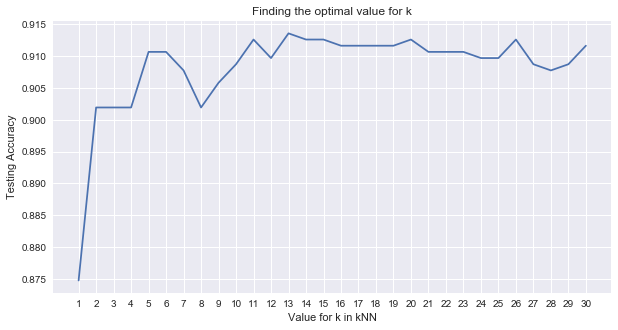

In [38]:
#Plotting the scores
plt.figure(figsize=(10,5))
plt.plot(k_range,scores)
plt.xlabel('Value for k in kNN')
plt.ylabel('Testing Accuracy')
plt.xticks(k_range)
plt.title('Finding the optimal value for k')

plt.show()

When the value of k=13, the model experiences it's best accuracy while balancing bias and variance so that it generalizes well to unseen data.

KNN (K=13)

In [39]:
'''It's important to re-train the model on the 
entire training data once we optimize our algorithm so as to not miss out some data.'''

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [40]:
y_pred = knn.predict(X)

In [41]:
print('The Improved accuracy Score is at {:.1f} %'.format(accuracy_score(y,y_pred)*100))

The Improved accuracy Score is at 92.0 %


# ASSESSING THE MODEL

NULL ACCURACY

Accuracy that could be achieved by always predicting the most frequent class in the testing set.

Answers the question, if my model was to predict the dominant class 100% of the time, how often would it be correct?

In [42]:
#Class distribution

y_test.value_counts()

0    912
1    118
Name: y_yes, dtype: int64

In [43]:
type(y_test)

pandas.core.series.Series

In [44]:
#Percentage of ones
ones = y_test.mean()
ones

0.1145631067961165

In [45]:
#Percentage of zeros

zeros = 1 - y_test.mean()

zeros


0.8854368932038835

In [46]:
print('If our model was to always predict that a user would not subscribe to the product' 
      '\n it would be accurate {:.1f} % of the time'.format(zeros * 100))

If our model was to always predict that a user would not subscribe to the product
 it would be accurate 88.5 % of the time


In [47]:
#Comparing the true and predicted response values

print('True:', y_test.values[0:30])
print('Pred:', y_pred[0:30])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


With the above stated intuition, our KNN model almost always predicts that a user will not subscribe to the product, i.e. it predict a zero when the true value is a zero and a zero when the true value is a one (at times).

CONFUSION MATRIX

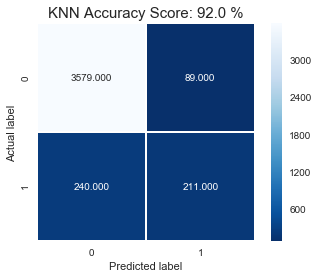

In [48]:
#A complete picture of how our classifier is performing

sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Accuracy Score: {:2.1f} %'.format(accuracy_score(y, y_pred) * 100)
plt.title(all_sample_title, size = 15);

With the confusion matrix above, we can see that KNN predicted that 211 customers would subscribe to the product while 3579 customers would not.

Furthermore, the model incorrectly predicted that 89 customers would subscribe to the term-deposit.


CLASSIFICATION REPORT

In [49]:
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      3668
          1       0.70      0.47      0.56       451

avg / total       0.91      0.92      0.91      4119

